In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

1) Загружаем датасет, с которым будем работать

In [22]:
my_data = pd.read_csv('amazon.csv', low_memory=False)
my_data.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

2) График, показывающий количество слов в столбце описания товаров.
Как мы можем видеть, есть товары без описания

<Axes: title={'center': 'Word Count Distribution'}, ylabel='Frequency'>

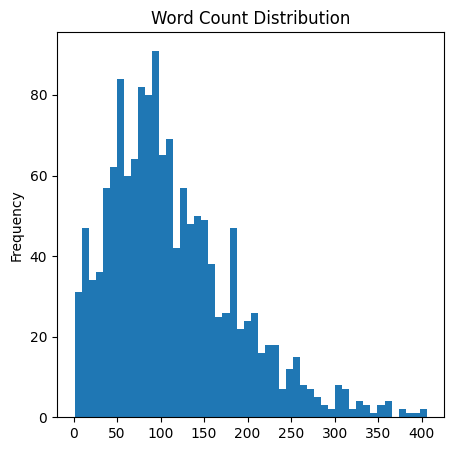

In [3]:
my_data['word_count'] = my_data['about_product'].apply(lambda x: len(str(x).split()))
my_data['word_count'].plot(kind='hist', bins = 50, figsize = (5,5),title='Word Count Distribution')

3) Нам нужно адаптировать наш датасет для более удобной работы. Удаляем из описания все символы, не принадлежащие ASCII, знаки препинания и преобразуем буквы в нижний регистр.

In [4]:
def clean_data(x):
        if isinstance(x, list): 
            return [str.lower(i.replace("|", ",")) for i in x]             
        else:         
            if isinstance(x, str):
                return str.lower(x.replace(">", ","))          
            else:           
                return '' 
 
features = ['about_product','category']
for feature in features:
    my_data[feature] = my_data[feature].apply(clean_data)

def _removeNonAscii(s):
    return "".join(i for i in s if ord(i) < 128)

def make_lower_case(text):
    return text.lower()

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

def remove_tegs(text):
    html_pattern = re.compile('<.*?>"【')
    return html_pattern.sub(r'', text)

my_data['about_product'] = my_data['about_product'].apply(func=_removeNonAscii)
my_data['about_product'] = my_data['about_product'].apply(func=make_lower_case)
my_data['about_product'] = my_data['about_product'].apply(func=remove_punctuation)
my_data['about_product'] = my_data['about_product'].apply(func=remove_tegs)

my_data['category'] = my_data['category'].apply(func=_removeNonAscii)
my_data['category'] = my_data['category'].apply(func=make_lower_case)
my_data['category'] = my_data['category'].apply(func=remove_punctuation)
my_data['category'] = my_data['category'].apply(func=remove_tegs)


my_data.dropna()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,word_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,computers accessories accessories peripherals ...,₹399,"₹1,099",64%,4.2,"24,269",high compatibility compatible with iphone 12 1...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,132
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,computers accessories accessories peripherals ...,₹199,₹349,43%,4.0,"43,994",compatible with all type c enabled devices be ...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,93
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,computers accessories accessories peripherals ...,₹199,"₹1,899",90%,3.9,"7,928",fast charger data sync with built in safety pr...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,168
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,computers accessories accessories peripherals ...,₹329,₹699,53%,4.2,"94,363",the boat deuce usb 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,109
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,computers accessories accessories peripherals ...,₹154,₹399,61%,4.2,"16,905",charge sync function this cable comes with cha...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,home kitchen kitchen homeappliances waterpurif...,₹379,₹919,59%,4,"1,090",supreme quality 90 gram 3 layer thik pp spun f...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,71
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,home kitchen kitchen homeappliances smallkitch...,"₹2,280","₹3,045",25%,4.1,"4,118",230 volts 400 watts 1 year,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got ever

In [23]:
my_data["text"]=  my_data['about_product'] + ' '+ my_data['category']
df_shop= my_data[['product_id','product_name','text']]
df_shop.head(500)

,product_id,product_name,text
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...,...,...
495,B0949SBKMP,boAt Flash Edition Smart Watch with Activity T...,"1.3""(33mm) LCD display with a round dial that ..."
496,B09V175NP7,boAt Wave Lite Smartwatch with 1.69 Inches(4.2...,Screen Size: The 1.69 inch HD full touch displ...
497,B07WHSJXLF,"iQOO Z6 Pro 5G by vivo (Phantom Dusk, 8GB RAM,...",Snapdragon 778G comes with octa-core processor...
498,B0BD3T6Z1D,"Samsung Galaxy M32 Prime Edition (Light Blue, ...",Segment Best 16.21 centimeters (6.4-inch) Supe...


In [6]:
#Удаляем такие слова как "a" и "the"
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df_shop['text'])
tfidf_matrix.shape

#tfidf.get_feature_names_out()[1000:9000]

(1465, 9256)

In [7]:
indices = pd.Series(my_data.index, index=df_shop['product_name']).drop_duplicates()
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape #матрица косинусного сходства

(1465, 1465)

Теперь наш набор данных готов к обработке рекомендательной системой

In [16]:
# Возвращаем наиболее похожие товары
def get_recommendations(product_name, cosine_sim=cosine_sim):
    idx = indices[product_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:10]
    shop_indices = [i[0] for i in sim_scores]    
    print(df_shop['product_name'].iloc[shop_indices])
    print(sim_scores)

In [21]:
get_recommendations('boAt Stone 250 Portable Wireless Speaker with 5W RMS Immersive Audio, RGB LEDs, Up to 8HRS Playtime, IPX7 Water Resistance, Multi-Compatibility Modes(Black)')

806    boAt Stone 180 5W Bluetooth Speaker with Upto ...
804    boAt Stone 650 10W Bluetooth Speaker with Upto...
712    Zebronics ZEB-COUNTY 3W Wireless Bluetooth Por...
636    boAt Rockerz 330 in-Ear Bluetooth Neckband wit...
536    boAt Rockerz 400 Bluetooth On Ear Headphones W...
918    boAt Rockerz 400 Bluetooth On Ear Headphones W...
591    boAt Airdopes 121v2 in-Ear True Wireless Earbu...
599    boAt Rockerz 450 Bluetooth On Ear Headphones w...
671    ZEBRONICS Zeb-Astra 20 Wireless BT v5.0 Portab...
Name: product_name, dtype: object
[(806, 0.2641335328022119), (804, 0.23476306221741225), (712, 0.22167952077100925), (636, 0.21591975744148728), (536, 0.21461556582844904), (918, 0.21461556582844904), (591, 0.19886665460890973), (599, 0.1981548123700187), (671, 0.192337895651558)]
